In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

from Skeletons.Lab_AGX_202223_S3_skeleton import get_degree_distribution

In [11]:
# ------- IMPLEMENT HERE ANY AUXILIARY FUNCTIONS NEEDED ------- #
def normalize_columns(artist_audio_feat_B):
    columns_to_normalize = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                        'liveness', 'valence', 'tempo']

    for column in columns_to_normalize:
        min_value = artist_audio_feat_B[column].min()
        max_value = artist_audio_feat_B[column].max()
        artist_audio_feat_B[column] = (artist_audio_feat_B[column] - min_value) / (max_value - min_value)
    
    return artist_audio_feat_B

# --------------- END OF AUXILIARY FUNCTIONS ------------------ #

In [12]:
def plot_degree_distribution(degree_dict: dict, normalized: bool = False, loglog: bool = False) -> None:
    """
    Plot degree distribution from dictionary of degree counts.

    :param degree_dict: dictionary of degree counts (keys are degrees, values are occurrences).
    :param normalized: boolean indicating whether to plot absolute counts or probabilities.
    :param loglog: boolean indicating whether to plot in log-log scale.
    """
    # ------- IMPLEMENT HERE THE BODY OF THE FUNCTION ------- #
    degrees = list(degree_dict.keys())
    counts = list(degree_dict.values())

    if normalized:
        total_nodes = sum(counts)
        counts = [count / total_nodes for count in counts]

    if loglog:
        plt.loglog(degrees, counts, 'bo-')
        plt.xlabel('Degree', fontsize=12)
        plt.ylabel('Probability' if normalized else 'Count', fontsize=12)
        plt.title('Degree Distribution (Log-Log Scale)', fontsize=14)
    else:
        plt.plot(degrees, counts, 'bo-')
        plt.xlabel('Degree', fontsize=12)
        plt.ylabel('Probability' if normalized else 'Count', fontsize=12)
        plt.title('Degree Distribution', fontsize=14)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()
    # ----------------- END OF FUNCTION --------------------- #

In [13]:
def plot_audio_features_bar(artists_audio_feat: pd.DataFrame, artist1_id: str, artist2_id: str) -> None:
    """
    Plot a single figure with a plot of mean audio features of two different artists.

    :param artists_audio_feat: dataframe with mean audio features of artists.
    :param artist1_id: string with id of artist 1.
    :param artist2_id: string with id of artist 2.
    :return: None
    """
    # Filter the dataframe for the two artists
    artist1_data = artists_audio_feat[artists_audio_feat['artist_name'] == artist1_id]
    artist2_data = artists_audio_feat[artists_audio_feat['artist_name'] == artist2_id]

    # Get the audio feature labels and their positions on the x-axis
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']
    x_pos = np.arange(len(audio_features))

    # Get the mean values of audio features for artist 1 and artist 2
    artist1_values = artist1_data[audio_features].values[0]
    artist2_values = artist2_data[audio_features].values[0]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bar chart for artist 1
    ax.bar(x_pos, artist1_values, width=0.4, align='center', label=artist1_data['artist_name'].values[0])

    # Plot the bar chart for artist 2
    ax.bar(x_pos + 0.4, artist2_values, width=0.4, align='center', label=artist2_data['artist_name'].values[0])

    # Set the x-axis ticks and labels
    ax.set_xticks(x_pos + 0.2)
    ax.set_xticklabels(audio_features, rotation=45, ha='right')

    # Set the axis labels and title
    ax.set_xlabel('Audio Features')
    ax.set_ylabel('Mean Value')
    ax.set_title('Comparison of Mean Audio Features')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()
    # ----------------- END OF FUNCTION --------------------- #

In [14]:
def plot_audio_features_radar(artists_audio_feat: pd.DataFrame, artist1_id: str, artist2_id: str) -> None:
    """
    Plot a single figure with a radar plot of mean audio features of two different artists.

    :param artists_audio_feat: dataframe with mean audio features of artists.
    :param artist1_id: string with id of artist 1.
    :param artist2_id: string with id of artist 2.
    :return: None
    """
    # Filter the dataframe for the two artists
    artist1_data = artists_audio_feat[artists_audio_feat['artist_name'] == artist1_id]
    artist2_data = artists_audio_feat[artists_audio_feat['artist_name'] == artist2_id]

    # Get the audio feature labels and their positions on the radar plot
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo']
    angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the plot

    # Get the mean values of audio features for artist 1 and artist 2
    artist1_values = artist1_data[audio_features].values[0].tolist()
    artist1_values += artist1_values[:1]  # Repeat the first value to close the plot
    
    artist2_values = artist2_data[audio_features].values[0].tolist()
    artist2_values += artist2_values[:1]  # Repeat the first value to close the plot

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    # Plot the radar plot for artist 1
    ax.plot(angles, artist1_values, label=artist1_id)
    ax.fill(angles, artist1_values, alpha=0.25)

    # Plot the radar plot for artist 2
    ax.plot(angles, artist2_values, label=artist2_id)
    ax.fill(angles, artist2_values, alpha=0.25)

    # Set the angle ticks and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features, fontsize=8)

    # Set the y-axis labels and limits
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'])

    # Set the title and legend
    ax.set_title('Comparison of Mean Audio Features', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right')

    # Show the plot
    plt.show()

In [15]:

def plot_similarity_heatmap(artist_audio_features: pd.DataFrame, similarity: str, out_filename: str = None) -> None:
    """
    Plot a heatmap of the similarity between artists.

    :param artist_audio_features_df: dataframe with mean audio features of artists.
    :param similarity: string with similarity measure to use.
    :param out_filename: name of the file to save the plot. If None, the plot is not saved.
    :return: None
    """
    # Compute the similarity matrix
    similarity_matrix = artist_audio_features.drop('artist_id', axis=1).corr(method=similarity)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generate the heatmap
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True, ax=ax)

    # Set the title and labels
    ax.set_title(f"Similarity Heatmap ({similarity})")
    ax.set_xlabel("Artists")
    ax.set_ylabel("Artists")

    # Save the plot if a filename is provided
    if out_filename is not None:
        plt.savefig(out_filename)

    # Show the plot
    plt.show()
    # ----------------- END OF FUNCTION --------------------- #

In [16]:
Graph_B_und  = nx.read_graphml('/Users/nbiescas/Desktop/Graphs/Graphs_data/Undirected_graph_B.graphml')
Graph_D_und  = nx.read_graphml('/Users/nbiescas/Desktop/Graphs/Graphs_data/Undirected_graph_D.graphml')
Graph_B_w    = nx.read_graphml('/Users/nbiescas/Desktop/Graphs/Graphs_data/Weighted_Graph_B.graphml')

artist_audio_feat_B = pd.read_csv('/Users/nbiescas/Desktop/Graphs/Graphs_data/Mean_Audio_Features_graph_B.csv', index_col='artist_id_index')
artist_audio_feat_D = pd.read_csv('/Users/nbiescas/Desktop/Graphs/Graphs_data/Mean_Audio_Features_graph_D.csv', index_col='artist_id_index')
artists_audio_feat  = pd.read_csv('/Users/nbiescas/Desktop/Graphs/Graphs_data/All_Mean_Audio_Features_graph.csv')


In [17]:
deg_dist_B = get_degree_distribution(Graph_B_und)
deg_dist_D = get_degree_distribution(Graph_D_und)
deg_dist_B_w = get_degree_distribution(Graph_B_w)

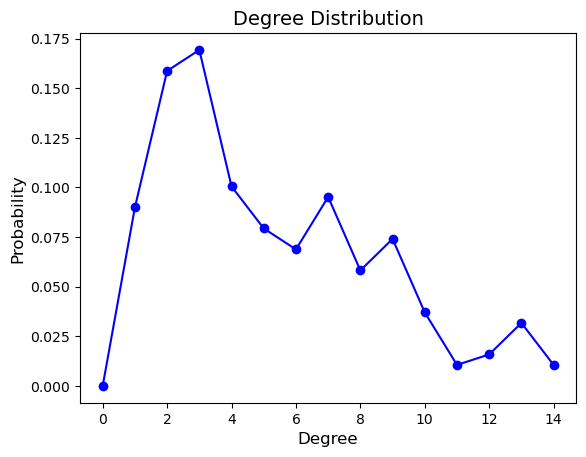

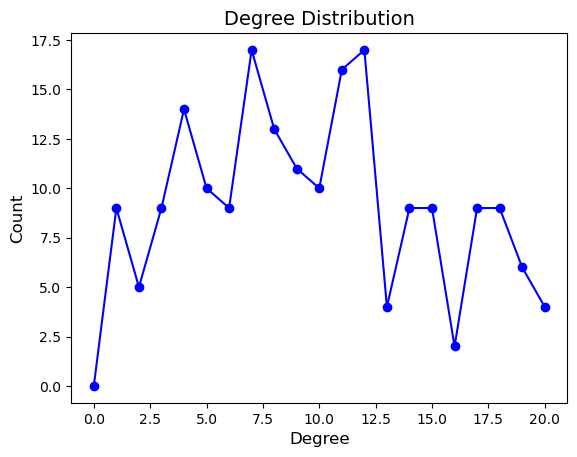

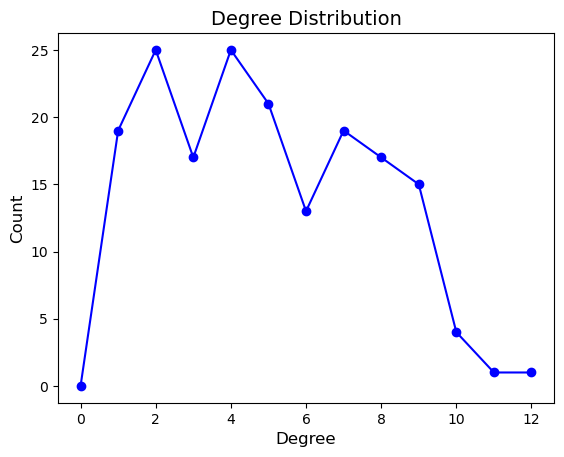

In [18]:
plot_degree_distribution(deg_dist_B,   normalized = True, loglog= False)
plot_degree_distribution(deg_dist_D,   normalized = False, loglog = False)
plot_degree_distribution(deg_dist_B_w, normalized = False, loglog= False)

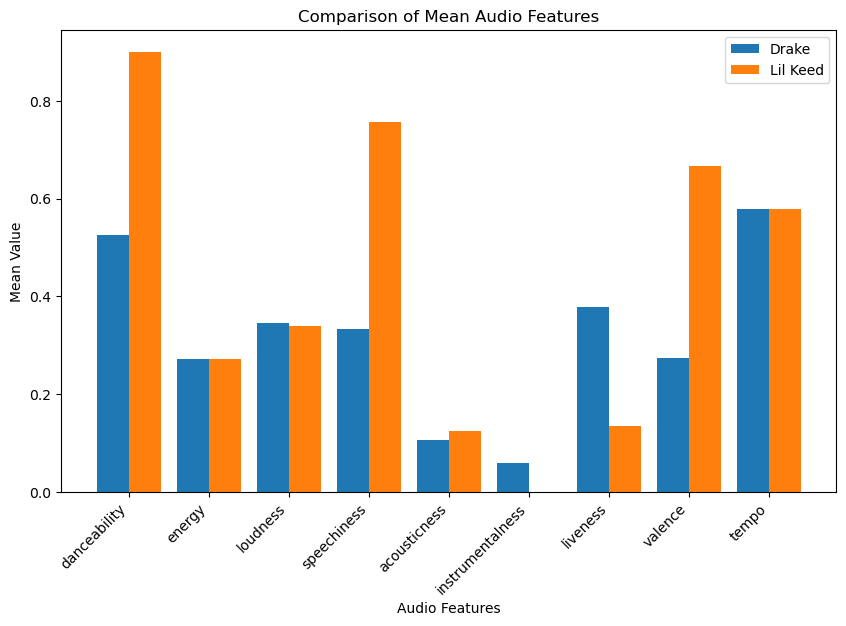

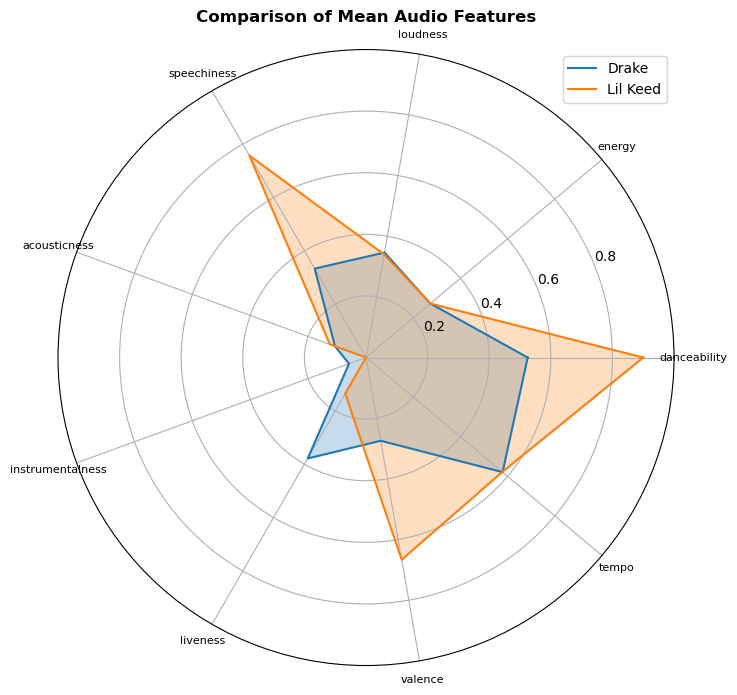

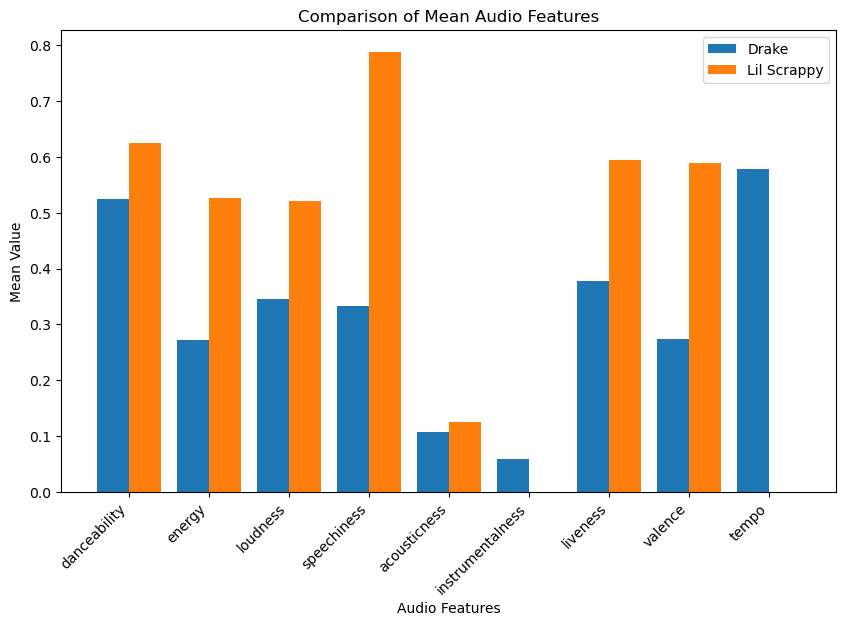

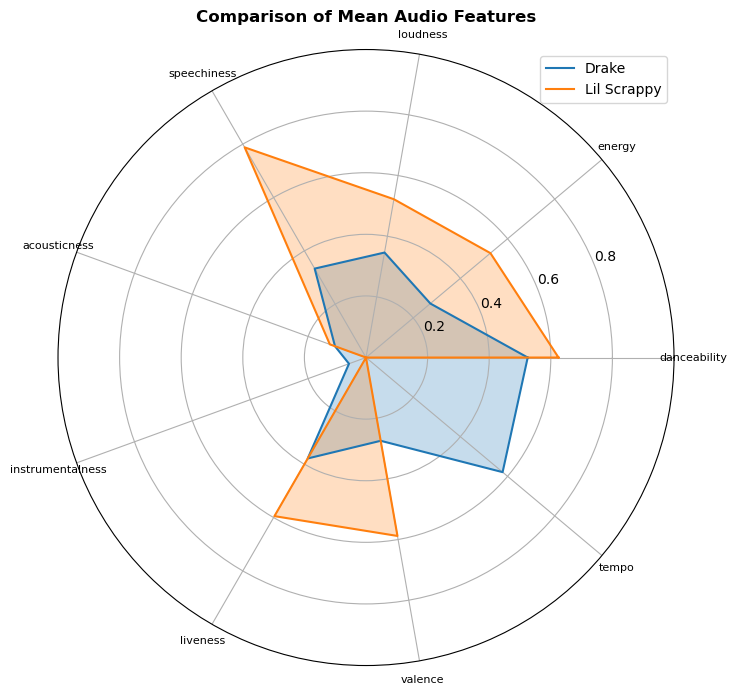

In [19]:
artist_audio_feat_B_norm = normalize_columns(artist_audio_feat_B)
plot_audio_features_bar(artist_audio_feat_B_norm, "Drake", "Lil Keed")
plot_audio_features_radar(artist_audio_feat_B_norm, "Drake", "Lil Keed")
plot_audio_features_bar(artist_audio_feat_B_norm, 'Drake', 'Lil Scrappy')
plot_audio_features_radar(artist_audio_feat_B_norm, 'Drake', 'Lil Scrappy')

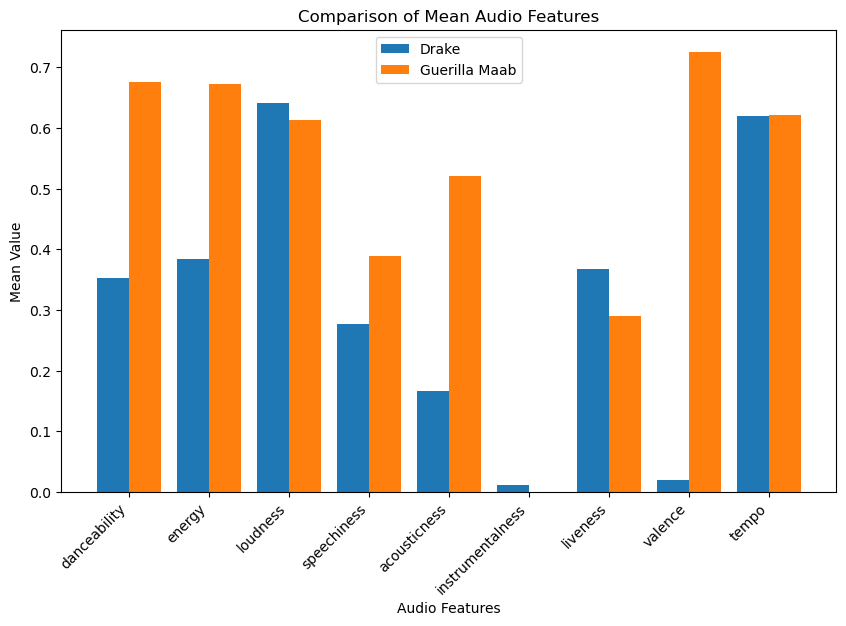

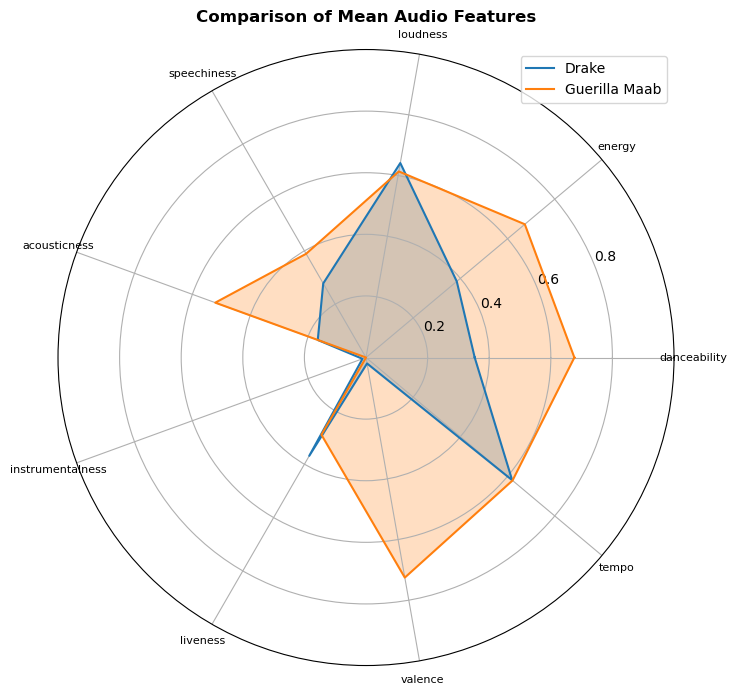

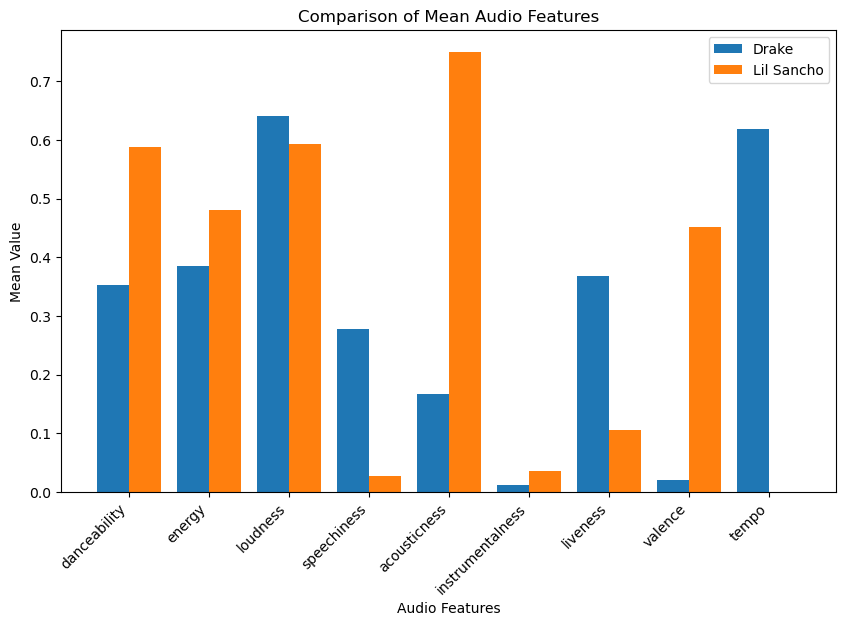

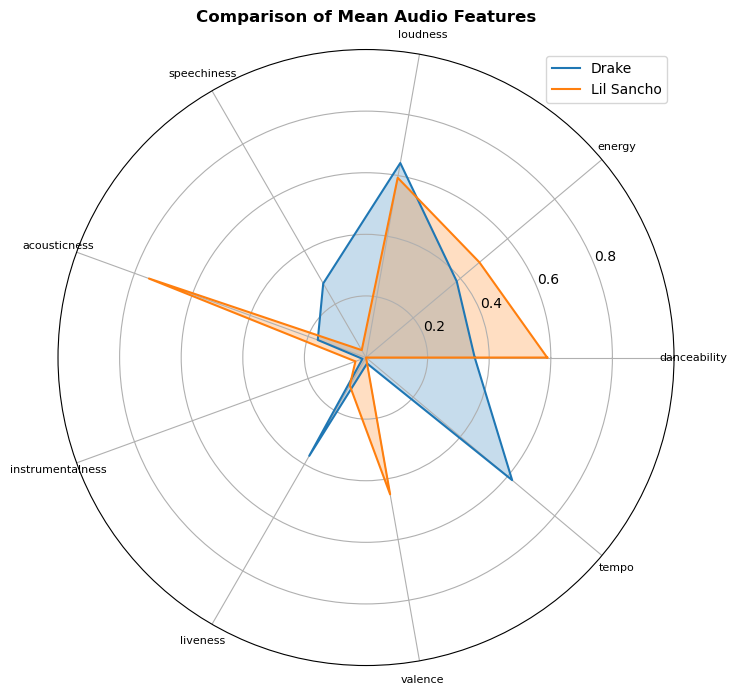

In [20]:
artist_audio_feat_D_norm = normalize_columns(artist_audio_feat_D)

plot_audio_features_bar(artist_audio_feat_D_norm, "Drake", "Guerilla Maab")
plot_audio_features_radar(artist_audio_feat_D_norm, "Drake", "Guerilla Maab")

plot_audio_features_bar(artist_audio_feat_D_norm, "Drake", "Lil Sancho")
plot_audio_features_radar(artist_audio_feat_D_norm, "Drake", "Lil Sancho")

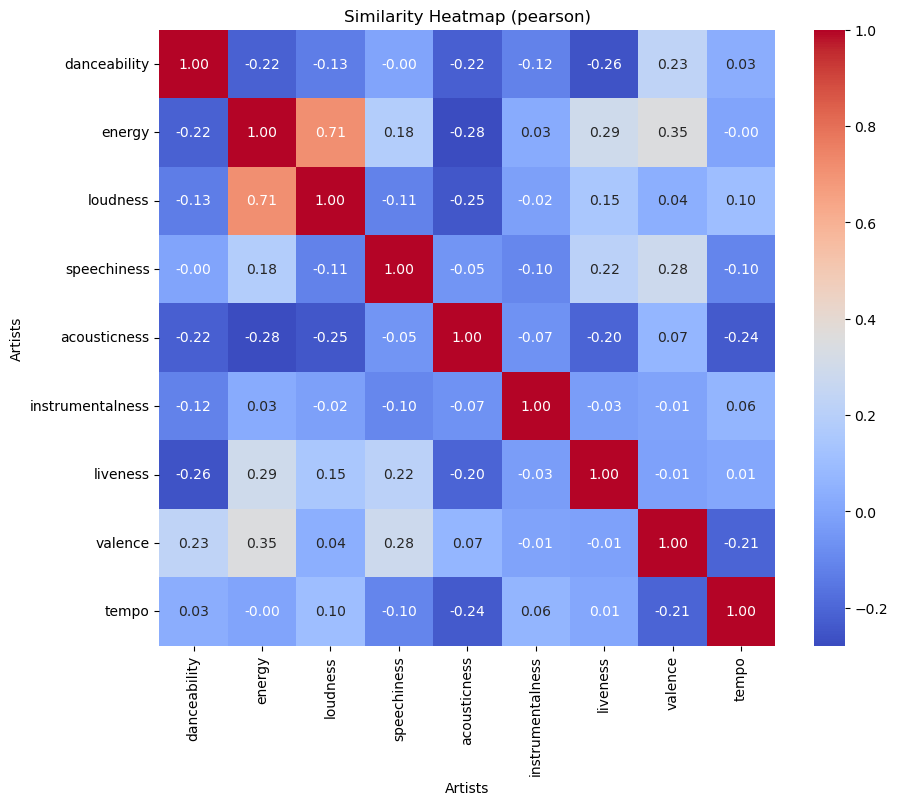

In [21]:
plot_similarity_heatmap(artists_audio_feat, "pearson", 'similarity_heatmap.png')